In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

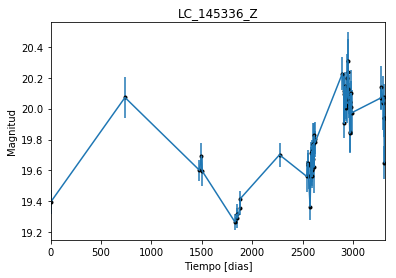

In [2]:
data = np.genfromtxt('LC_145336_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_145336_Z')
plt.savefig("LC_145336_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

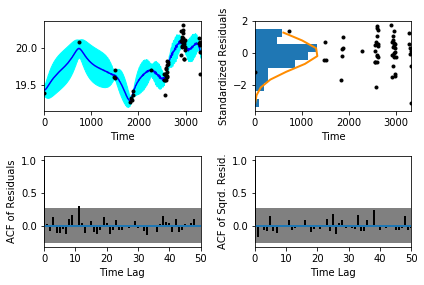

In [5]:
sample.assess_fit()

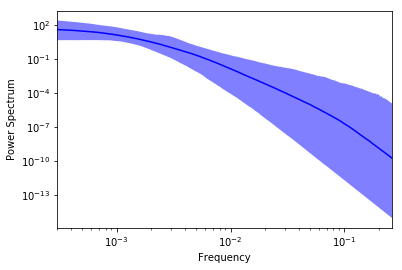

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

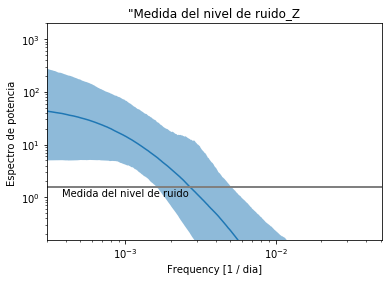

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_145336_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_145336_Z')

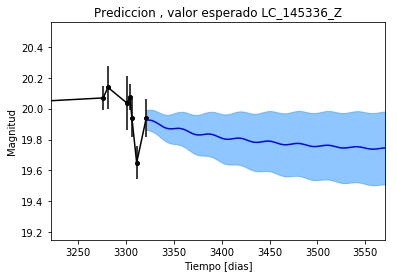

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_145336_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_145336_Z')

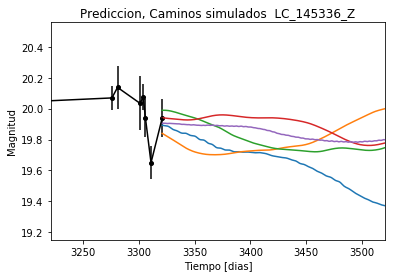

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_145336_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


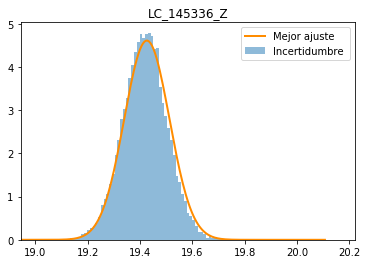

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_145336_Z')
plt.savefig("Mejor_ajuste_LC_145336_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_145336_Z')

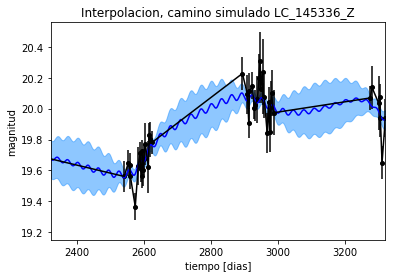

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_145336_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_145336_Z')

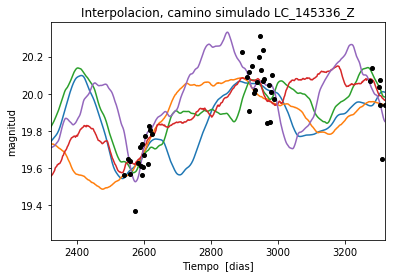

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_145336_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 507.44737785
Median: 0.00830283483158
Standard deviation: 0.100790324944
68% credibility interval: [ 0.0008609   0.11745241]
95% credibility interval: [  3.63515055e-04   3.81450864e-01]
99% credibility interval: [  3.11620383e-04   4.87439903e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 388.953284753
Median: 0.00152790538604
Standard deviation: 0.0408667853224
68% credibility interval: [ 0.00048171  0.01503083]
95% credibility interval: [ 0.00032266  0.13222775]
99% credibility interval: [  3.05564738e-04   3.18787051e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 560.012261693
Median: 0.0170797653621
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1993.4401648
Median: 55.1077943166
Standard deviation: 1.59752955408
68% credibility interval: [ 53.33187493  56.22632351]
95% credibility interval: [ 50.59692201  56.77365003]
99% credibility interval: [ 48.61737076  56.93994978]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 416.374390692
Median: 0.464139762298
Standard deviation: 1.16864410286
68% credibility interval: [ 0.04903131  2.18959199]
95% credibility interval: [ 0.01429244  3.98629115]
99% credibility interval: [ 0.00996656  5.01785097]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 586.57221567
Median: 0.179344926967
Standard deviation: 2.25236807072
68% credibility interval: [ 0.01060036  2.44367825]
95% credibility interval: [  8.76709395e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0311257
Median: 2.08156145475e-31
Standard deviation: 8.10265073394e+13
68% credibility interval: [  7.55124313e-56   1.27670901e-09]
95% credibility interval: [  6.95326075e-93   1.35241513e+00]
99% credibility interval: [  7.50089789e-132   4.15974855e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3068.38781286
Median: 19.7250604414
Standard deviation: 0.168795905688
68% credibility interval: [ 19.58215729  19.85761807]
95% credibility interval: [ 19.39047113  20.05279936]
99% credibility interval: [ 19.11679565  20.23827881]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 337.927794647
Median: 0.00242781801443
Standard deviation: 0.123219053165
68% credibility interval: [ 0.          0.16976364]
95% credibility interval: [ 0.         0.4507041]
99% credibility interval: [ 0.          0.51084709]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 337.927794647
Median: 0.00242781801443
Standard deviation: 0.123219053165
68% credibility interval: [ 0.          0.16976364]
95% credibility interval: [ 0.         0.4507041]
99% credibility interval: [ 0.          0.51084709]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 947.527652164
Median: 0.0
Standard deviation: 0.00061416749452
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1993.4401648
Median: 55.1077943166
Standard deviation: 1.59752955408
68% credibility interval: [ 53.33187493  56.22632351]
95% credibility interval: [ 50.59692201  56.77365003]
99% credibility interval: [ 48.61737076  56.93994978]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2921.0595677
Median: 0.101042759556
Standard deviation: 0.151480083274
68% credibility interval: [ 0.05749789  0.19975819]
95% credibility interval: [ 0.0376236   0.46920118]
99% credibility interval: [ 0.02903294  0.90449642]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2422.90473651
Median: 0.993959814838
Standard deviation: 0.160612317943
68% credibility interval: [ 0.8541852  1.1700917]
95% credibility interval: [ 0.74129579  1.36544669]
99% credibility interval: [ 0.67957533  1.50725437]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 453.704049431
Median: 0.000106366108067
Standard deviation: 0.0186930011933
68% credibility interval: [  3.10629317e-06   2.52941069e-03]
95% credibility interval: [  1.67629571e-07   2.72560936e-02]
99% credibility interval: [  3.73429883e-08   1.54575426e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 507.44737785
Median: (-0.0521682498217+0j)
Standard deviation: 1.00022359565
68% credibility interval: [-0.73797523+0.j         -0.00540921-0.00370201j]
95% credibility interval: [ -2.39672647e+00+0.j          -2.28403245e-03-0.00567052j]
99% credibility interval: [ -3.06267524e+00+0.j          -1.95796861e-03-0.01182087j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 388.953284753
Median: (-0.00960011267231+0j)
Standard deviation: 0.815678199334
68% credibility interval: [-0.09444149+0.35427075j -0.00302668+0.j        ]
95% credibility interval: [-0.83081143+2.10390609j -0.00202732+0.j        ]
99% credibility interval: [ -2.00299811e+00+2.77188445j  -1.91991987e-03+0.00677908j]
Posterior summary for parameter ar_ro